In [60]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from random import randint                                          # Importing to generate random integers
from sklearn.preprocessing import StandardScaler                    # Importing standard scaler to perform standardization
from sklearn.feature_selection import SelectFromModel               # To select features from model using Yellow bricks
from yellowbrick.model_selection import FeatureImportances          # To select important features out of the model
#-------------------------------------------------------------------------------------------------------------------------------
from imblearn.over_sampling import SMOTE                            # To handle class imbalance problem
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import classification_report                   # To generate complete report of evaluation metrics
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix 
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.naive_bayes import GaussianNB                          # To create a naive bayes model using algorithm
from sklearn.ensemble import RandomForestClassifier                 # To create a random forest model using algorithm
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

ImportError: ignored

In [ ]:
#handlE duplicate data.
before_shape = data.shape
print('Data Shape [Before]:', before_shape)

data.drop_duplicates(inplace = True)

after_shape = data.shape
print('Data Shape [After]:', after_shape)

drop_nums = before_shape[0] - after_shape[0]
drop_percent = np.round(drop_nums / before_shape[0], decimals = 5) * 100

print('Drop Ratio:', drop_percent, '%')


print('Contains Redundant Records?:', data.duplicated().any())
print('Duplicate Count:', data.duplicated().sum())

In [ ]:
fig = plt.figure(figsize = [15, 8])
plt.subplot(1, 2, 1)
sns.countplot(x = 'Class', data = data, palette = ['#56DB7F', '#DB5E56'])
plt.xlabel(xlabel = 'Class', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution', size = 14)

plt.subplot(1, 2, 2)
space = np.ones(2)/10
data['Class'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, figsize = [15, 8], legend = True, colors = ['#56DB7F', '#DB5E56'])
plt.legend(['Not Fraud', 'Fraud'])
plt.ylabel(ylabel = 'Class', size = 14)
plt.title(label = 'Proportion Distribution', size = 14)
plt.tight_layout(pad = 3.0)
plt.suptitle(t = 'Frequency & Proportion of Fraudulent Transactions', y = 1.02, size = 16)
plt.show()

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Pandas Profiling](#section3)
4. [Data plot's before data cleaning and pre processing for understanding of raw data.](#section4)
5. [Preprocessing](#section5)
6. [Feature Selection using Random Forest](#section6)
7. [EDA](#section7)
8. [Regularization for features selection](#section8)
9. [Linear Regression using Selected Features](#section9)<br>
    - 9.1 [Linear regression in scikit-learn](#section901)<br>
    - 9.2 [Interpreting Model Coefficients](#section902)<br>
    - 9.3 [Using the Model for Prediction](#section903)<br>
    - 9.4 [Model evaluation using metrics](#section904)<br>
    - 9.5 [Model Evaluation using Rsquared value.](#section905)<br>

10. [Decision Tree using selected features](#section10)<br>
    - 10.1 [Decision Tree in scikit-learn](#section1001)<br>
         - 10.1.1 [Using the Model for Prediction](#section1011)<br>    
         - 10.1.2 [Model evaluation using Metrics](#section1012)<br>    
         - 10.1.3 [__R Square of Decision Tree [Best Model Evaluated for House Price]__](#section1013)<br>             
    - 10.2 [Decision Tree with Gridsearch](#section1002)<br>
         - 10.2.1 [RMSE value for Decision Tree](#section1021)<br>
         - 10.2.2 [Model Evaluation using R Square](#section1022)<br>
    - 10.3 [Decision Tree with Gridsearch [Hyperparameter Optimization]](#section1003)<br>
	     - 10.3.1 [RMSE value for Decision Tree](#section1031)<br>
         - 10.3.2 [Model Evaluation using R Square](#section1032)<br>
    - 10.4 [Hyperparameter Optimization with Gridsearch -Auto Paramater Optimization](#section1004)<br>
	     - 10.4.1 [RMSE value for Decision Tree with Hyperparameter tuning](#section1041)<br>
         - 10.4.2 [Model Evaluation using R Square](#section1042)<br>
    - 10.5 [Decision Tree using GridSearchCV](#section1005)<br>
         - 10.5.1 [RMSE value of Decision Tree using GridSearchCV](#section1051)<br>
	     - 10.5.2 [R-Square value of Decision Tree using GridSearchCV](#section1052)<br>

11. [Random Forest using selected features](#section1011)<br>
    - 11.1 [Random Forest without parameter in scikit-learn](#section1111)<br>
         - 11.1.1 [Model without parameter specification](#section11111)<br>    
         - 11.1.2 [Using the Model for Prediction](#section11112)<br>  
	     - 11.1.3 [RMSE value of Random Forest](#section11113)<br>
         - 11.1.4 [Model evaluation for Random Forest](##section1114)<br>             
    - 11.2 [Random Forest - Hyper parameter for RF tuning using RANDOM SEARCH](#section11002)<br>
	     - 11.2.1 [RMSE Value of Random Forest using Random Search and Hyperparamter Tuning](#section11121)<br>
         - 11.2.2 [Model Evaluation__ using r2_score](#section11122)<br>    

12. [Comparision of Models](#section12)<br>
    - 11.1 [Model - Linear Regression](#section1201)<br>
    - 11.2 [Model - Decision Tree](#section1202)<br>
    - 11.3 [Model - Random Forest](#section1203)<br>    
13. [Conclusion](#section13)


<a id=section1></a>
### 1. Problem Statement 

In [ ]:
To find the defaulter 

<a id=section2></a>
### 2. Data Loading and Description

In [2]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)         # To display all the data in each column
pd.set_option('display.max_columns', None)          # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.


import plotly.graph_objs as go


In [3]:
creditcard = pd.read_excel('https://github.com/BhavnaJadhav/BRJRepository/blob/master/CreditCArd_Dataset1570451338541-191213-152349.xlsx?raw=true',sheet_name = 'UCI_Credit_Card')


In [32]:
creditcard.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


Dataset Information :
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

In [ ]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
creditcard.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


<a id=section3></a>
## 3. Pandas Profiling

In [ ]:
import pandas_profiling
profile = creditcard.profile_report(title="Creditcard Profiling before Data Preprocessing", progress_bar=False, minimal=True)
profile.to_file(output_file="creditcard_profiling_before_preprocessing.html")

NameError: name 'creditcard' is not defined

In [ ]:
# def modify_data(data):
#   # Renaming features
#   data.rename(mapper = {'v1': 'Label', 'v2':'Message'}, axis = 1, inplace = True)

#   # Dropping unnecessary features
#   data.drop(labels = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

#   # Adding a new feature named as lenght
#   data['Length'] = data['Message'].apply(len)
  
#   return data

## EDA

Text(0.5, 1.0, 'Distplot showing the distribution of LIMIT BAL')

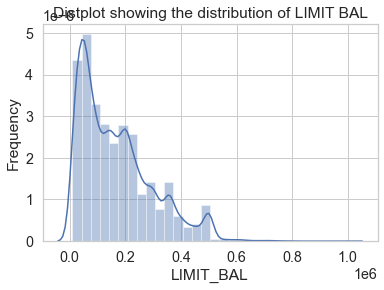

In [ ]:
#Distplot before pre processing 
sns.distplot(creditcard['LIMIT_BAL'],30)
plt.xlabel('LIMIT_BAL')
plt.ylabel('Frequency')
plt.title('Distplot showing the distribution of LIMIT BAL')

Observation : 
- the distplot is right skewed . 
- not smooth on the right side 
- mean =167484.322667 , std =129747.661567 , min. 10000.000000 , median 140000.000000 , max = 10,00,000 . 

In [ ]:
# to find most limit balance given to customers .
creditcard['LIMIT_BAL'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
800000        2
760000        1
690000        1
1000000       1
327680        1
Name: LIMIT_BAL, Length: 81, dtype: int64

<AxesSubplot:>

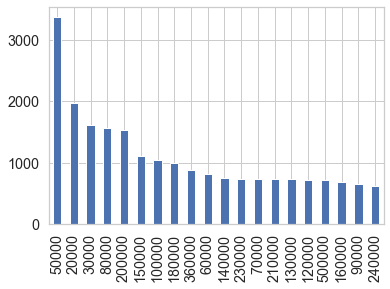

In [ ]:
creditcard['LIMIT_BAL'].value_counts().head(20).plot(kind = 'bar')

<AxesSubplot:ylabel='SEX'>

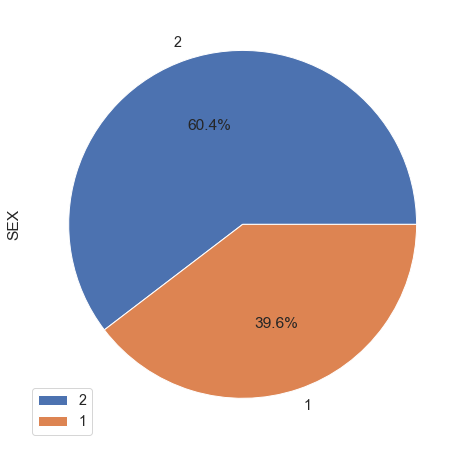

In [ ]:
creditcard['SEX'].value_counts().plot(kind = 'pie',legend = 'TRUE',figsize = (10,8),autopct = '%.1f%%' )


60% females are using credit card  . and 40 % males . 

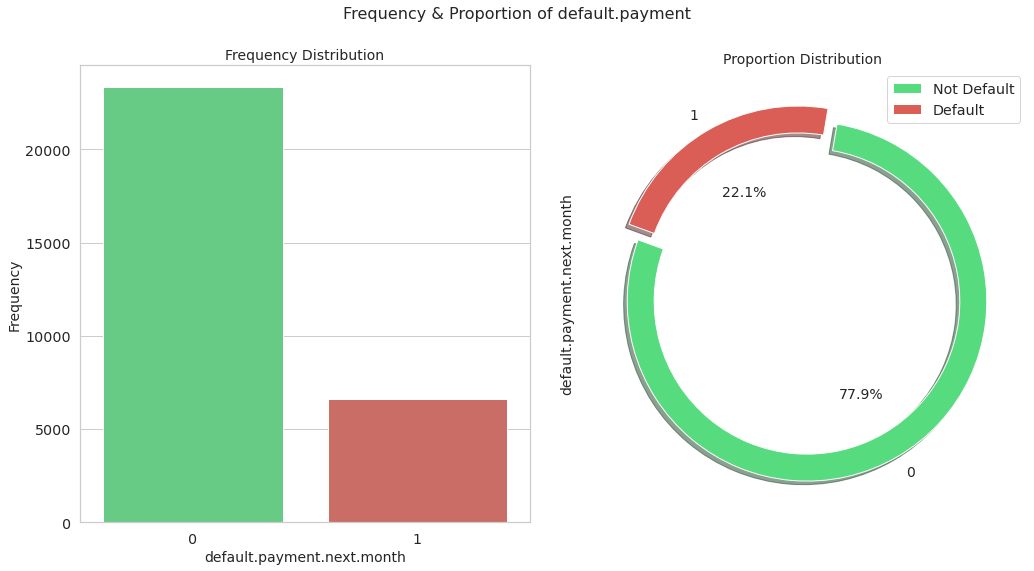

In [49]:
fig = plt.figure(figsize = [15, 8])
plt.subplot(1, 2, 1)
sns.countplot(x = 'default.payment.next.month', data = creditcard, palette = ['#56DB7F', '#DB5E56'])
plt.xlabel(xlabel = 'default.payment.next.month', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution', size = 14)

plt.subplot(1, 2, 2)
space = np.ones(2)/20
creditcard['default.payment.next.month'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, figsize = [15, 8], legend = True, colors = ['#56DB7F', '#DB5E56'])
plt.legend(['Not Default', 'Default'])
plt.ylabel(ylabel = 'default.payment.next.month', size = 14)
plt.title(label = 'Proportion Distribution', size = 14)
plt.tight_layout(pad = 3.0)
plt.suptitle(t = 'Frequency & Proportion of default.payment', y = 1.02, size = 16)
plt.show()

Observation:

We can observe that there are few defaulters in the dataset .
Imbalance in data set is seen , will have to work on this as it may create problem in model building .



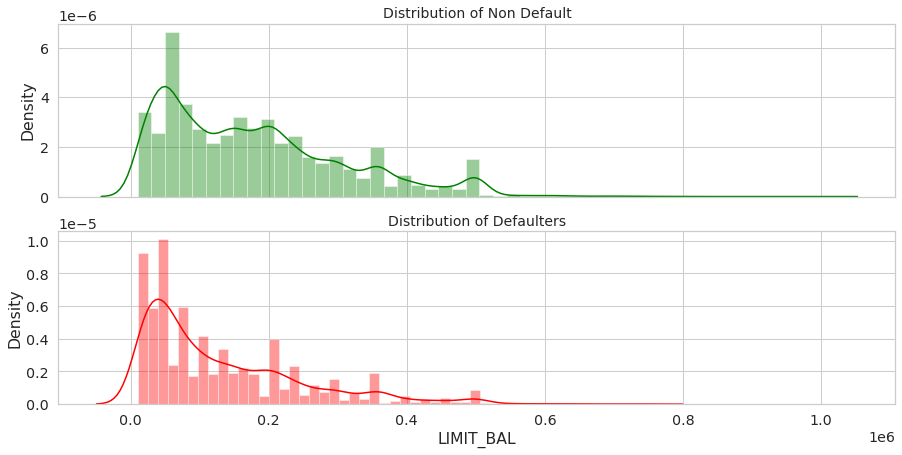

In [53]:
# Slicing data with no defaulters :
nodefault = creditcard['LIMIT_BAL'][creditcard['default.payment.next.month'] == 0]

# Slicing data with fraudulent transactions
defaulters = creditcard['LIMIT_BAL'][creditcard['default.payment.next.month'] == 1]

# Plotting the distribution of the sliced data
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (15, 7))
sns.distplot(a = nodefault, bins = 50, ax = ax1, color = 'green')
ax1.set_title(label = 'Distribution of Non Default', size = 14)
ax1.set_xlabel(xlabel = '')
sns.distplot(a = defaulters, bins = 50, ax = ax2, color = 'red')
ax2.set_title(label = 'Distribution of Defaulters', size = 14)
plt.show()

### Observations :
Defaulters  are more towards min. limit balance 

In [ ]:
creditcard[['SEX','EDUCATION']].groupby('SEX')['EDUCATION'].value_counts()      #.plot(kind = 'pie',legend = 'TRUE',figsize = (10,8),autopct = '%.1f%%' )

SEX  EDUCATION
1    2            5374
     1            4354
     3            1990
     5              95
     4              42
     6              25
     0               8
2    2            8656
     1            6231
     3            2927
     5             185
     4              81
     6              26
     0               6
Name: EDUCATION, dtype: int64

sex wise Education 

<AxesSubplot:xlabel='SEX,EDUCATION'>

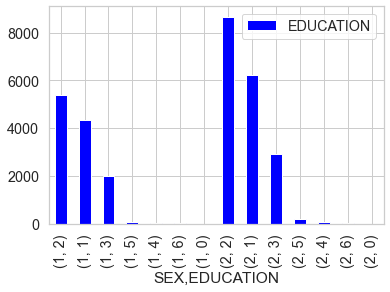

In [ ]:
creditcard[['SEX','EDUCATION']].groupby('SEX')['EDUCATION'].value_counts().plot(kind ='bar' ,cmap = 'winter' ,legend ='TRUE')

The university females are highest in number 8k +  , followed by females who graduated from schools .
and males who has done universities are 5k + , and males who are school gradutes 4k + 

<AxesSubplot:ylabel='MARRIAGE'>

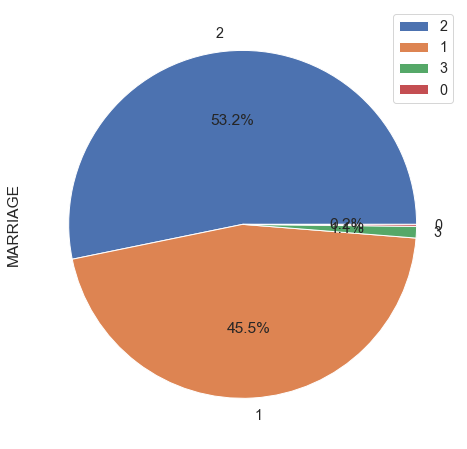

In [ ]:
creditcard['MARRIAGE'].value_counts().plot(kind = 'pie',legend = 'TRUE',figsize = (10,8),autopct = '%.1f%%' )


### Observations :
Shows more married females then men are using credit card . 


In [ ]:
creditcard['AGE'].value_counts()    #.plot(kind = 'pie',legend = 'TRUE',figsize = (10,8),autopct = '%.1f%%' )


In [ ]:
Counter(creditcard['default.payment.next.month']).most_common()[:5]

In [ ]:
corr = creditcard.corr()


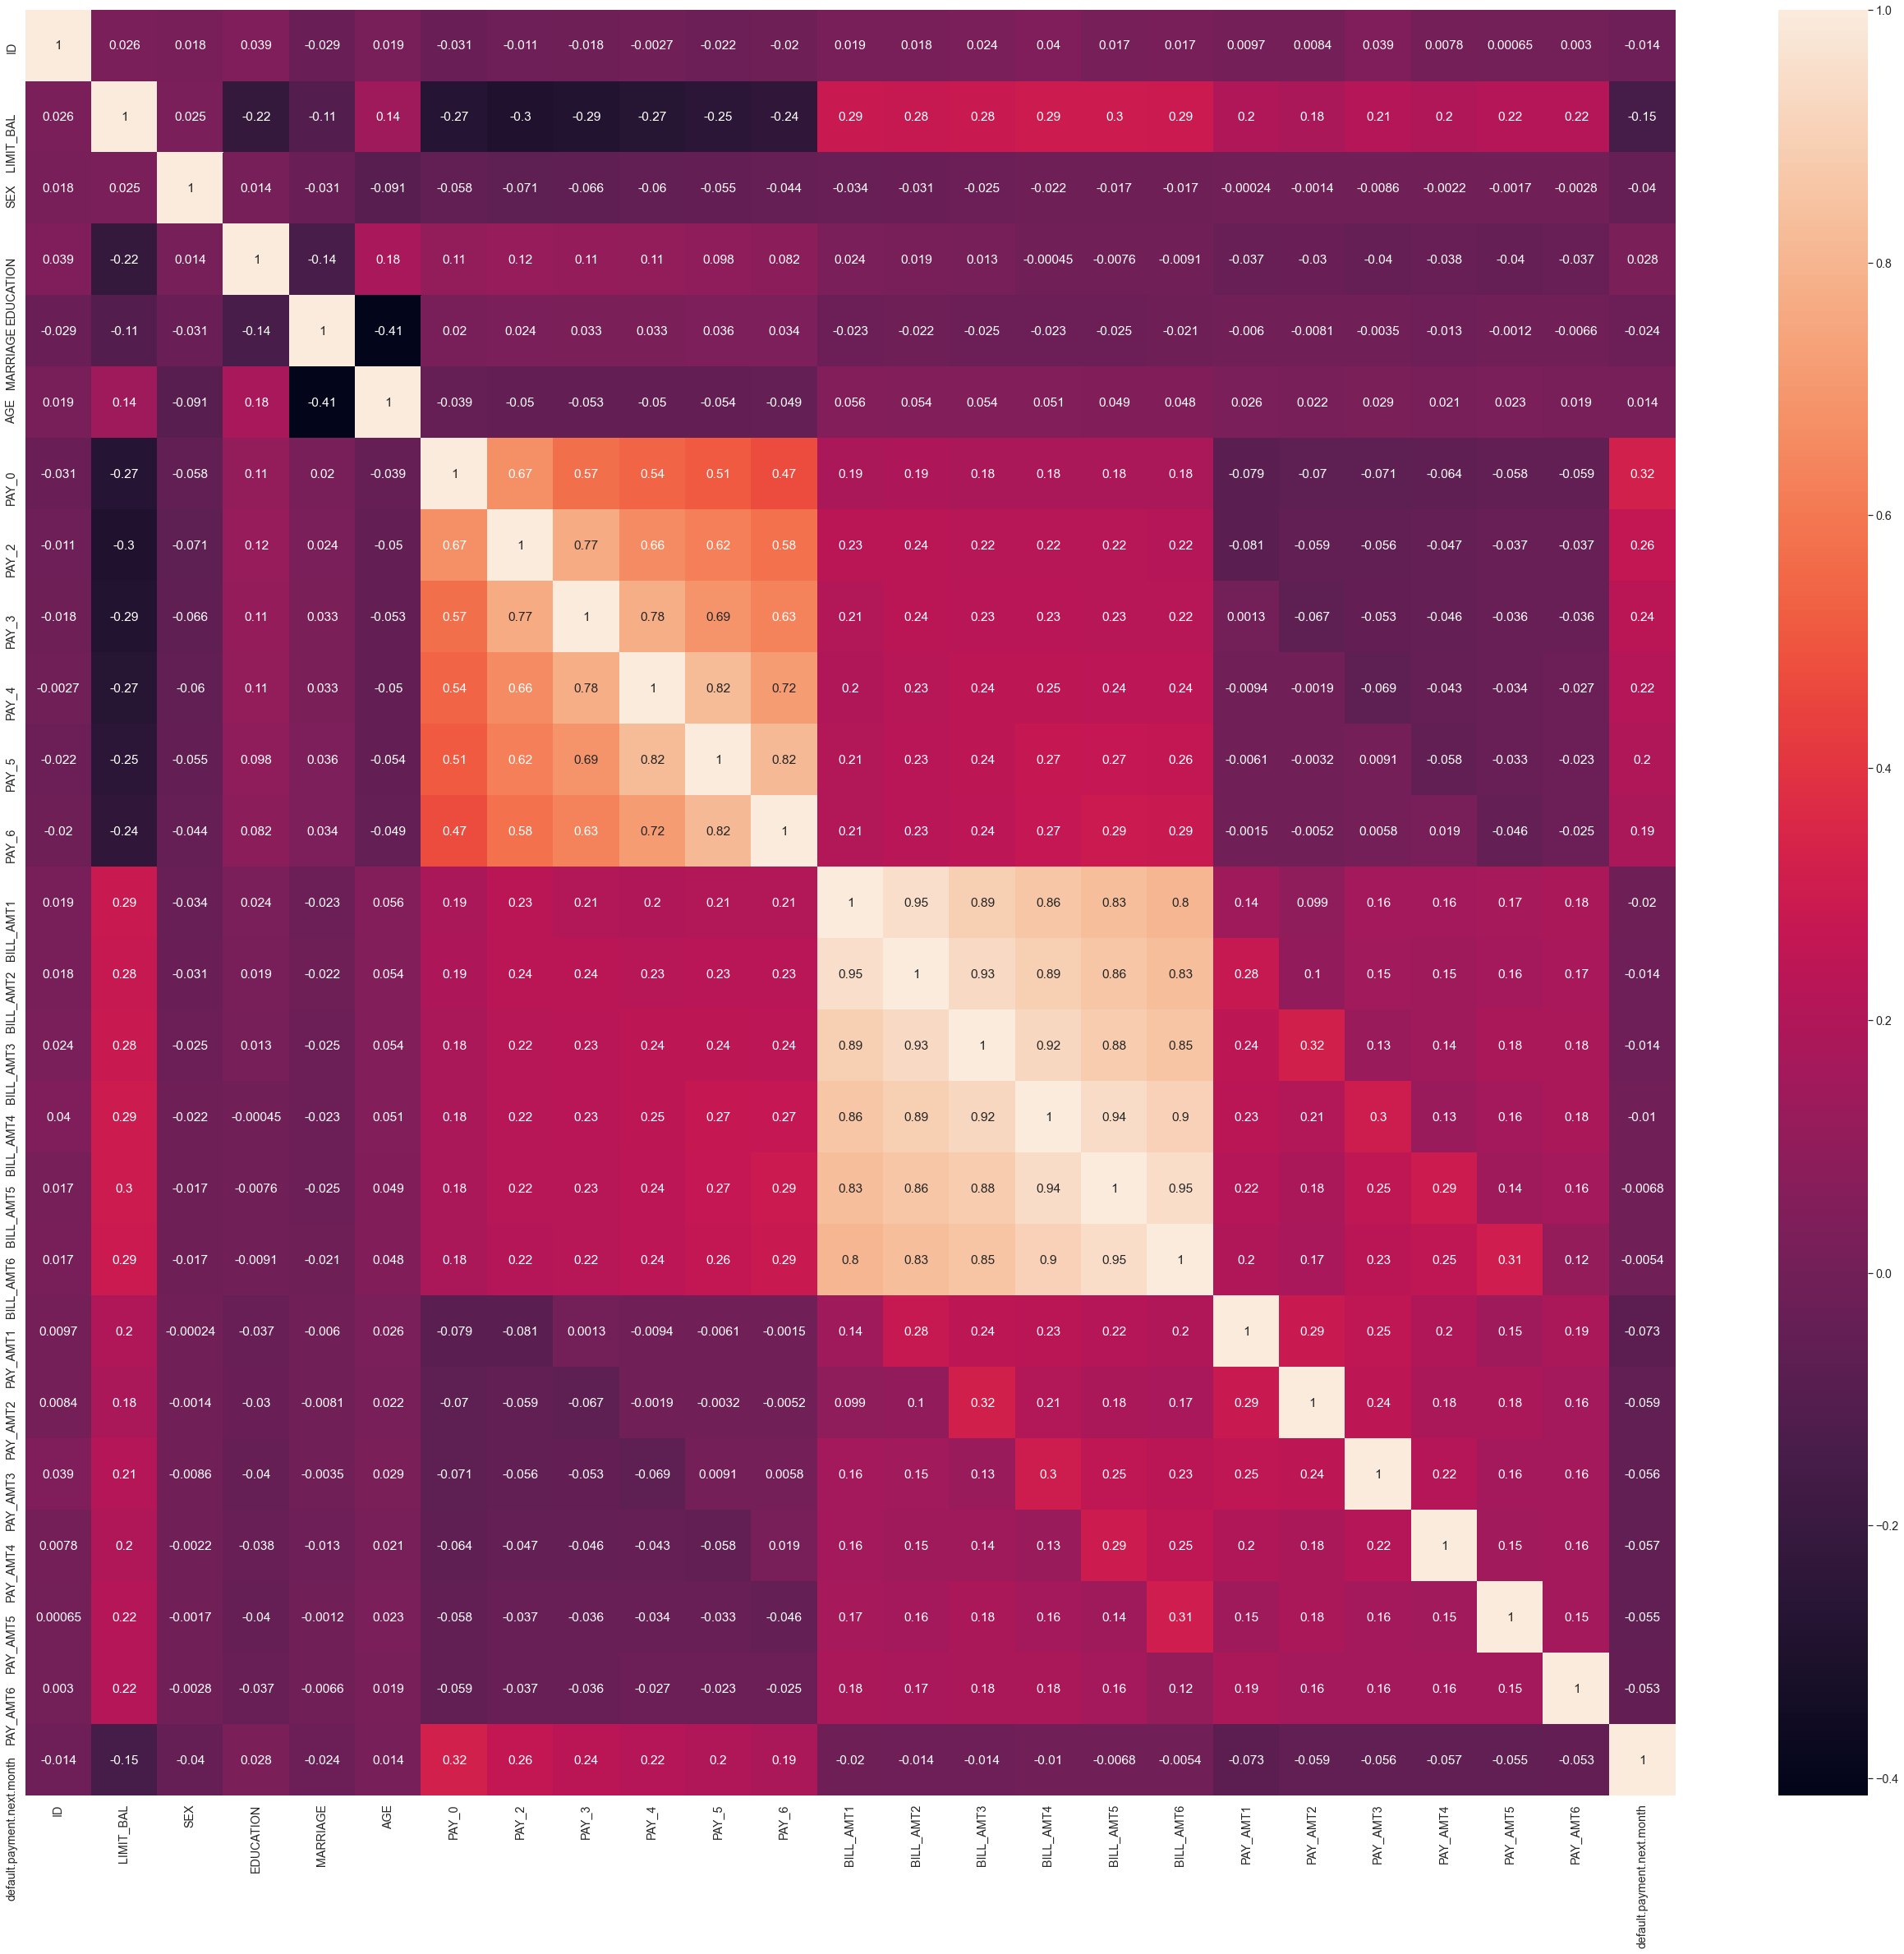

In [ ]:

plt.figure(figsize=(45,40))
a = sns.heatmap(corr,annot  = True )

In [ ]:
sns.scatterplot(x= 'LIMIT_BAL' ,y = 'default.paymentnext.month',data = creditcard [['default.paymentnext.month','LIMIT_BAL']] )

KeyError: "['default.paymentnext.month'] not in index"

### Post Data Processing & Feature Selection

- Now we will **perform standardization** and **feed it** to the **Random Forest**.

- **Random Forest** will then **identify important features** for our model **using threshold**.

- This threshold is **used over** the **information gain** which results in **reduction in impurity**.

- And **finally** we will **split** our **data** for the **model development**.

Data Standardization**

- Here we will perform standardization over the input features.

In [57]:
# Saving all feature names to a list in a variable
dataColumns = creditcard.columns.to_list()

# Removing Class feature as it is our target
dataColumns.remove('default.payment.next.month')

encoder = StandardScaler()

for i in dataColumns:
   creditcard[i] = encoder.fit_transform(creditcard[[i]])

print('Success!')

Success!


We have **successfully transformed and scaled** our data

Now Feature Selection using Random Forest

- Now in **real world**, it is very **rare** that **all** the **features** are **important** while developing the model.

- So **instead** we **analyze** the **impact** of **input over the target** feature.

- We do so by either performing **statistical** **tests** (Pearson, ANOVA, Chi-Square) or by using **Random Forest**.

- **Random forests** are one the most **popular machine learning algorithms** because they **provide**:
 - **a good predictive performance**,
 - **low overfitting and**
 - **easy interpretability.**

- This **interpretability** is **derived** from the **importance of each feature** on the tree decision **evaluated** on the **reduction** in **impurity**.

- In other words, it is **easy to compute** how much **each feature is contributing** to the **decision**.

- **Below** we have **implemented** a function namely, **SelectFromModel** **available** in **Sklearn** which **uses** the **base estimator** to **identify** **important features**.

- The **importance** of feature is **determined** on the **basis** of **threshold** (a measure to calculate feature importance).

In [68]:
!pip install -q yellowbrick 

In [70]:
#from sklearn.naive_bayes import GaussianNB                          # To create a naive bayes model using algorithm
#from sklearn.ensemble import RandomForestClassifier                 # To create a random forest model using algorithm
#from yellowbrick.model_selection import FeatureImportances          # To select important features out of the model

In [82]:
X = creditcard.drop('default.payment.next.month', axis = 1)
y = creditcard['default.payment.next.month']


In [83]:
# Have some patience, may take some time :)
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(X, y)

# Extracting list of important features
selected_feat = X.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Features:', selected_feat)

Total Features Selected are 15
Threshold set by Model: 0.04
Features: ['ID', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT6']


**Visualization of Important Features:**

- Below features are plotted against their relative importance (in %age),  of each feature.

In [63]:
figure = plt.figure(figsize = [20, 12])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative = False)
viz.fit(X1, y1)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()

NameError: ignored

<Figure size 1440x864 with 0 Axes>

In [84]:
# Data Preparation
X = creditcard[selected_feat]
y = creditcard['default.payment.next.month']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42, stratify = y)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (27000, 15) (27000,)
Testing Data Shape: (3000, 15) (3000,)


### Model Development & Evaluation

- In this section we will **develop Gaussian Naive Bayes using important features** and **tune** our **model if required**.

- Then we will **analyze the results** obtained and **make our observation**.

- For **evaluation purpose** we will **focus** on **precision and recall value** for **positive class** i.e. fraudulent class.

- **Remember** that **we want generalize results** i.e. same results or error on testing data as that of training data.

- We will **observer** **whether** the **SMOTE** is **required** or not **because** we want to **focus** on **precision and recall** values of **positive class**.

In [86]:
def plot_precision_recall(y_true, y_pred, train_or_test):
  '''
  y_true: Acutal values of the target
  y_pred: Predicted values of the target. Either predict_proba or decision_function
  line_show: Plot avergae values "precision" or "recall"
  train_or_test: Train Data or Test Data
  '''
  precisions, recalls, thresholds = precision_recall_curve(y_true = y_true, probas_pred = y_pred)

  average_precision = np.mean(precisions)
  average_recall = np.mean(recalls)

  sns.lineplot(x = recalls, y = precisions, linewidth = 2, ci = None)
  plt.plot([0, 1], [average_precision, average_precision], 'r-')
  plt.plot([average_recall, average_recall], [0, 1], 'g-')
  plt.xlabel('Recall', fontsize = 14)
  plt.xticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
  plt.yticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
  plt.ylabel('Precision', fontsize = 14)
  plt.title(train_or_test, fontsize = 16)
  plt.legend(labels = ['Binary PR Curve', 'AP {:.2f}'.format(average_precision), 'AR {:.2f}'.format(average_recall)])
  plt.grid(True)

### Naive Bayes - Baseline Model

In [88]:
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix 

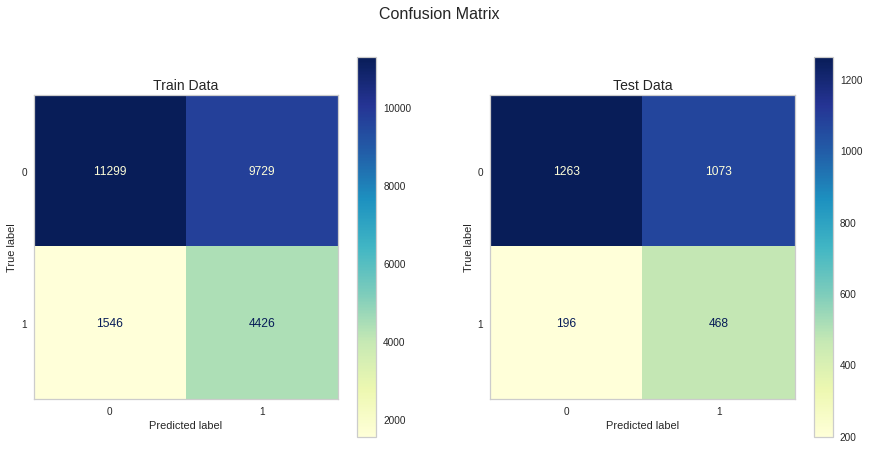

In [89]:
naive = GaussianNB()
naive.fit(X_train, y_train)

y_train_pred_count = naive.predict(X_train)
y_test_pred_count = naive.predict(X_test)

y_train_pred_proba = naive.predict_proba(X_train)
y_test_pred_proba = naive.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = naive, X = X_train, y_true = y_train, values_format = '.7g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = naive, X = X_test, y_true = y_test, values_format = '.7g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

**Observation:**

- **Train Data:**
  - Model predicted **11299 instances correctly** for **negative class** while **4426 instances** were predicted **correctly** for **positive class**.
  - Model **identified 1546 instance negative but in actual** they **were positive**.
  - Model **identified 9729 instances positive but in actual** they **were negative**.

- **Test Data:**
  - Model predicted **1263 instances correctly** for **negative class** while **468 instances** were predicted **correctly** for **positive class**.
  - Model **identified 196 instances negative but in actual** they **were positive**.
  - Model **identified 1073 instances positive but in actual** they **were negative**.

In [91]:
#def ClassificationReport():
  
 

In [96]:
logistic_report_train = classification_report(y_train, y_train_pred_count)
logistic_report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(logistic_report_train)
print('                    Testing Report           ')
print(logistic_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       0.88      0.54      0.67     21028
           1       0.31      0.74      0.44      5972

    accuracy                           0.58     27000
   macro avg       0.60      0.64      0.55     27000
weighted avg       0.75      0.58      0.62     27000

                    Testing Report           
              precision    recall  f1-score   support

           0       0.87      0.54      0.67      2336
           1       0.30      0.70      0.42       664

    accuracy                           0.58      3000
   macro avg       0.58      0.62      0.55      3000
weighted avg       0.74      0.58      0.61      3000



**Observation:**

- We can **observe** that accuracy is low for train and test data . 

- The **precision** score is pretty **good** in both **training** data as well as on **testing** data for non defaulters .

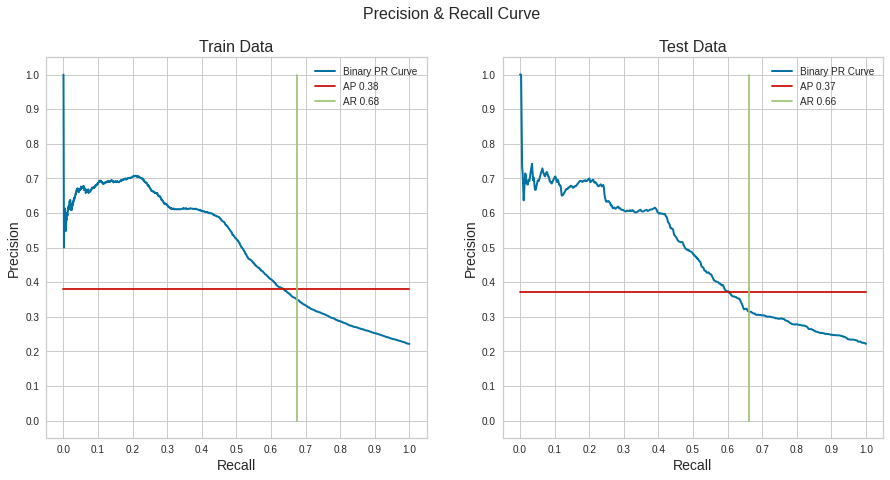

In [98]:
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
figure = plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
plot_precision_recall(y_true = y_train, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

plt.subplot(1, 2, 2)
plot_precision_recall(y_true = y_test, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

plt.suptitle('Precision & Recall Curve', size = 16)
plt.show()

**Observation:**

- We can **observe** that **average precision** and **average recall** scores are **also low**.

- To improve the scores over the model we **need** to **oversample** the **data**.

- In the next section we **will implement** a **SMOTE technique** which will help us in **improving** the **model** **score**.

SMOTE Technique & its Implementation**

- SMOTE refers to **Synthetic Minority Oversampling Technique**.

- It **aims** to **balance class distribution** by **randomly** **increasing minority class** examples **by replicating** them. 

- It **synthesises** **new minority instances** **between** **existing** minority **instances**. 

- **It generates the virtual training records by linear interpolation for the minority class.** 

- These synthetic training **records** are **generated** by **randomly** selection*.

- It is performed by one or more of the k-nearest neighbors for each **example in the minority class**. 

- **After** the **oversampling process**, the **data is reconstructed** and several classification models can be applied for the processed data.

<br> 
**<center><h3>Working of SMOTE</h3></center>**

<center><img src = "https://raw.githubusercontent.com/insaid2018/Term-3/master/Images/SMOTE.gif"></center>

In [99]:
# before implementing SMOTE
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (27000, 15) (27000,)
Testing Data Shape: (3000, 15) (3000,)


In [101]:
#Performing SMOTE
from imblearn.over_sampling import SMOTE                            # To handle class imbalance problem

sm = SMOTE(random_state = 42, ratio = 1)
X1, y1 = sm.fit_sample(X, y)

X_new = pd.DataFrame(data = X1, columns = X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_new, y1, test_size = 0.2, random_state = 42, stratify = y1)

In [102]:
# Target Sample Verification
pd.Series(y1).value_counts()

1    23364
0    23364
dtype: int64

In [103]:
#After Implementing SMOTE 
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (37382, 15) (37382,)
Testing Data Shape: (9346, 15) (9346,)


 ### Naive Bayes - Oversampled Model

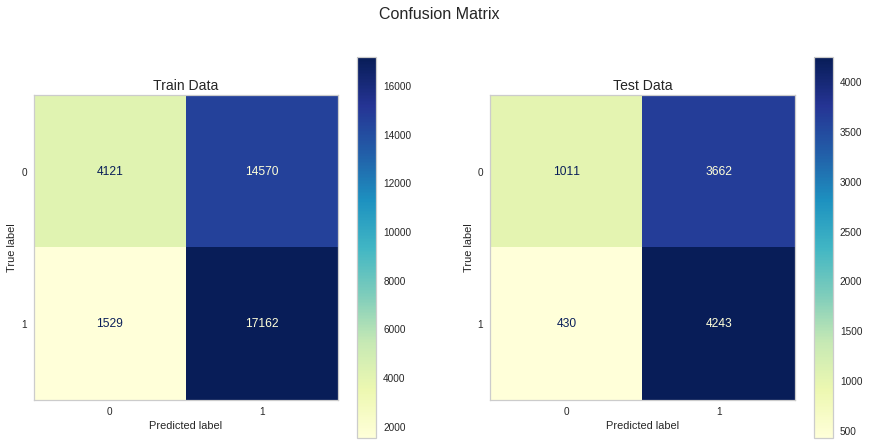

In [104]:
naive = GaussianNB()
naive.fit(X_train, y_train)

y_train_pred_count = naive.predict(X_train)
y_test_pred_count = naive.predict(X_test)

y_train_pred_proba = naive.predict_proba(X_train)
y_test_pred_proba = naive.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = naive, X = X_train, y_true = y_train, values_format = '.7g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = naive, X = X_test, y_true = y_test, values_format = '.7g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

In [105]:
logistic_report_train = classification_report(y_train, y_train_pred_count)
logistic_report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(logistic_report_train)
print('                    Testing Report           ')
print(logistic_report_test)

                    Training Report          
              precision    recall  f1-score   support

           0       0.73      0.22      0.34     18691
           1       0.54      0.92      0.68     18691

    accuracy                           0.57     37382
   macro avg       0.64      0.57      0.51     37382
weighted avg       0.64      0.57      0.51     37382

                    Testing Report           
              precision    recall  f1-score   support

           0       0.70      0.22      0.33      4673
           1       0.54      0.91      0.67      4673

    accuracy                           0.56      9346
   macro avg       0.62      0.56      0.50      9346
weighted avg       0.62      0.56      0.50      9346



**Observation:**

- We can **observe** that  our **metrics** are **not looking good now**.

- The **precision** and **recall** **scores** have LOW values now for the **positive class**.

SMOTE did not work in this case ..WHY? 

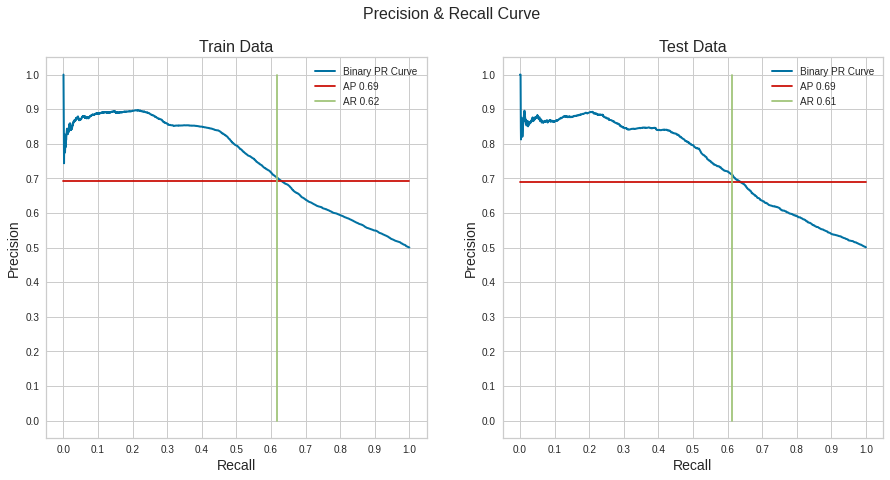

In [106]:
figure = plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
plot_precision_recall(y_true = y_train, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

plt.subplot(1, 2, 2)
plot_precision_recall(y_true = y_test, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

plt.suptitle('Precision & Recall Curve', size = 16)
plt.show()

 <!-- Conclusion**
---

- We **studied in breifly about the data**, its **characteristics** and its **distribution**.

- We **explored** some **questions related** to fraudulent and non-fraudulent transactions.

- We **investigated in depth about the features** which to **retain** and which to **discard**.

- We **performed model development** **with and without oversampling technique** known as SMOTE.

- We **observed low precision and recall scores** with **baseline model** but **great results with oversampled model**.

- This **model** now can **help us** in **identifying** which transactions are fraudulent and which are not. 

- Additionally, this **model** will **help** business **saving** **a lot of resources** (money, human resources etc.). -->

In [9]:
X = pd.DataFrame()
def generate():
    X = creditcard.loc[:,creditcard.columns != 'default.payment.next.month']
    return X
X = generate()
X.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [14]:
y = pd.DataFrame()
def generate():
    y = creditcard.loc[:,creditcard.columns == 'default.payment.next.month']
    return y
y = generate()
y.head(100)

,default.payment.next.month
0,1
1,1
2,0
3,0
4,0
...,...
95,0
96,0
97,0
98,0


In [11]:
#from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import StandardScaler
# def generate():
#     standardized = StandardScaler()
#     standardized.fit(X)
#     return standardized.transform(X)
# X = generate()

Split X and y into train and test dataset with test_size = 0.25, random_state=0.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

 Check the shape of X and y of train dataset

In [17]:
print(X_train.shape)
print(y_train.shape)

(22500, 24)
(22500, 1)


In [18]:
print(X_test.shape)
print(y_test.shape)

(7500, 24)
(7500, 1)


Create a KNN model instance with n_neighbors = 1 and fit this model to the training data.



In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn_model1 = KNeighborsClassifier(n_neighbors = 1)
knn_model1.fit(X_train, y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Use RandomizedSearchCV for hyperparameter tuning of your k nearest neighbor classifier.

Keep n_iter as 25, random_state as 0.

For the parameter range use the below ranges:

n_neighbors: range(1, 30),

algorithm : ["auto", "ball_tree"],

leaf_size : 2 ** np.arange(10),

metric : ["euclidean", "manhattan", "minkowski", "chebyshev"]

Return the RandomizedSearchCV model at the end of the function.

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
import numpy as np

def generate():
    param_dist = {"n_neighbors": range(1, 30),                             #  specify parameters and distributions to sample from
                  "algorithm" : ["auto", "ball_tree"],
                  "leaf_size" :  2 ** np.arange(10),
                  "metric" : ["euclidean", "manhattan", "minkowski", "chebyshev"]
                 }
    

    n_iter_search = 25
    knn_model = KNeighborsClassifier()
    
    return RandomizedSearchCV(knn_model, random_state=0, param_distributions=param_dist,     
                                    n_iter=n_iter_search,
                                    n_jobs=-1)

knn_model2 = generate()
knn_model2.fit(X_train,y_train)               

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=25, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree'],
                                        'leaf_size': array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512]),
                                        'metric': ['euclidean', 'manhattan',
                                                   'minkowski', 'chebyshev'],
                                        'n_neighbors': range(1, 30)},
                   pre_dispatch='2*n_jobs', random_state=0

In [23]:
import numpy as np
from sklearn.metrics import accuracy_score
accuracy_list = []
def generate():
    for i in range(1,30):
        knn_model_ = KNeighborsClassifier(n_neighbors = i)
        knn_model_.fit(X_train, y_train)
        pred_i = knn_model_.predict(X_test)
        accuracy_list.append(accuracy_score(y_test, pred_i))
    
    print("Maximum accuracy and the corresponding value of k is",
          max([(v,i+1) for i,v in enumerate(accuracy_list)]),'respectively.')

generate()

Maximum accuracy and the corresponding value of k is (0.7824, 28) respectively.


Plot the accuracy values of model at various k values (saved in accuracy_list) and find the best value of k.

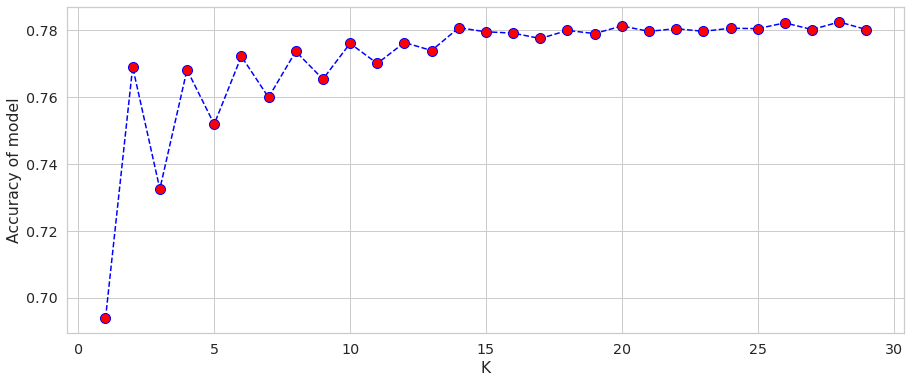

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
def generate():
    plt.figure(figsize=(15,6))
    plt.plot(range(1,30), accuracy_list, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize='10')
    plt.xlabel('K')
    plt.ylabel('Accuracy of model')
    plt.show()
generate()

 Using the best value of k, create KNN model instance with n_neighbors = 28
  and fit this model to the training data.

In [25]:
from sklearn.neighbors import KNeighborsClassifier
def generate():
    knn_model3 = KNeighborsClassifier(n_neighbors = 28)
    knn_model3.fit(X_train, y_train)
    return knn_model3
knn_model3 = generate()

Instantitate and fit Logistic Regression model using scikit-learn with random_state = 0.

In [26]:
from sklearn.linear_model import LogisticRegression
def generate():
    logreg = LogisticRegression(random_state = 0)
    logreg.fit(X_train,y_train)
    return logreg
logreg = generate()

 Use the models for making predictions on the X_test
Make predictions using knn_model1, knn_model2, knn_model3, knn_model4, and logreg models.

Name the predictions based on model as: predictions_knn_model1, predictions_knn_model2, predictions_knn_model3, predictions_logreg

In [27]:
def generate():
    predictions_knn_model1 = knn_model1.predict(X_test)
    predictions_knn_model2 = knn_model2.predict(X_test) 
    predictions_knn_model3 = knn_model3.predict(X_test)
    predictions_logreg = logreg.predict(X_test)
    return predictions_knn_model1, predictions_knn_model2, predictions_knn_model3, predictions_logreg

predictions_knn_model1,predictions_knn_model2,predictions_knn_model3,predictions_logreg = generate()

Evaluate all the models with respect to y_test using accuracy score and print them out.

In [28]:
from sklearn.metrics import accuracy_score
def generate():
    print('\n\n Accuracy score for test data for knn_model1 is :',accuracy_score(y_test, predictions_knn_model1))
    print('\n\n Accuracy score for test data for knn_model2 is :',accuracy_score(y_test, predictions_knn_model2))
    print('\n\n Accuracy score for test data for knn_model3 is :',accuracy_score(y_test, predictions_knn_model3))
    print('\n\n Accuracy score for test data for logreg model is :',accuracy_score(y_test, predictions_logreg))
    return 
generate()



 Accuracy score for test data for knn_model1 is : 0.6938666666666666


 Accuracy score for test data for knn_model2 is : 0.7806666666666666


 Accuracy score for test data for knn_model3 is : 0.7824


 Accuracy score for test data for logreg model is : 0.7825333333333333


 Evaluate all the models respect to y_test using confusion matrix and print them out.

In [30]:
from sklearn.metrics import confusion_matrix
matrix_knn_model1 = pd.DataFrame()
matrix_knn_model2 = pd.DataFrame()
matrix_knn_model3 = pd.DataFrame()
matrix_logreg = pd.DataFrame()
def generate():
    matrix_knn_model1 = pd.DataFrame(confusion_matrix(y_test, predictions_knn_model1))
    matrix_knn_model1.index = ['Actual Not Frauds','Actual Frauds']
    matrix_knn_model1.columns = ['Predicted Not Frauds','Predicted Frauds']
    print('\n\n confusion matrix for knn_model1 is\n\n',matrix_knn_model1)
    
    matrix_knn_model2 = pd.DataFrame(confusion_matrix(y_test, predictions_knn_model2))
    matrix_knn_model2.index = ['Actual Not Frauds','Actual Frauds']
    matrix_knn_model2.columns = ['Predicted Not Frauds','Predicted Frauds'] 
    print('\n\n confusion matrix for knn_model2 is\n\n',matrix_knn_model2)
    
     
    matrix_knn_model3 = pd.DataFrame(confusion_matrix(y_test, predictions_knn_model3))
    matrix_knn_model3.index = ['Actual Not Frauds','Actual Frauds']
    matrix_knn_model3.columns = ['Predicted Not Frauds','Predicted Frauds'] 
    print('\n\n confusion matrix for knn_model2 is\n\n',matrix_knn_model3)
    
    matrix_logreg = pd.DataFrame(confusion_matrix(y_test, predictions_logreg))
    matrix_logreg.index = ['Actual Not Frauds','Actual Frauds']
    matrix_logreg.columns = ['Predicted Not Frauds','Predicted Frauds'] 
    print('\n\n confusion matrix for logreg is\n\n',matrix_logreg)
    
    return 
generate()



 confusion matrix for knn_model1 is

                    Predicted Not Frauds  Predicted Frauds
Actual Not Frauds                  4723              1145
Actual Frauds                      1151               481


 confusion matrix for knn_model2 is

                    Predicted Not Frauds  Predicted Frauds
Actual Not Frauds                  5738               130
Actual Frauds                      1515               117


 confusion matrix for knn_model2 is

                    Predicted Not Frauds  Predicted Frauds
Actual Not Frauds                  5752               116
Actual Frauds                      1516               116


 confusion matrix for logreg is

                    Predicted Not Frauds  Predicted Frauds
Actual Not Frauds                  5868                 0
Actual Frauds                      1631                 1


Evaluate all the models respect to y_test using classification report and print them out.

In [31]:
from sklearn.metrics import classification_report
def generate():
    print('\n\n classification report for knn_model1:\n\n',classification_report(y_test, predictions_knn_model1))
    print('\n\n classification report for knn_model2:\n\n',classification_report(y_test, predictions_knn_model2))
    print('\n\n classification report for knn_model3:\n\n',classification_report(y_test, predictions_knn_model3))
    print('\n\n classification report for logreg:\n\n',classification_report(y_test, predictions_logreg))
    return
generate()



 classification report for knn_model1:

               precision    recall  f1-score   support

           0       0.80      0.80      0.80      5868
           1       0.30      0.29      0.30      1632

    accuracy                           0.69      7500
   macro avg       0.55      0.55      0.55      7500
weighted avg       0.69      0.69      0.69      7500



 classification report for knn_model2:

               precision    recall  f1-score   support

           0       0.79      0.98      0.87      5868
           1       0.47      0.07      0.12      1632

    accuracy                           0.78      7500
   macro avg       0.63      0.52      0.50      7500
weighted avg       0.72      0.78      0.71      7500



 classification report for knn_model3:

               precision    recall  f1-score   support

           0       0.79      0.98      0.88      5868
           1       0.50      0.07      0.12      1632

    accuracy                           0.78      7500

### NAIVE BAYES 